# Mapping LAPD crime data

### Import Python tools

In [1]:
%load_ext lab_black

In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd

---

### Read the data

In [32]:
src = pd.read_csv(
    "../../data/lapd/lapd_crimes_2010_present_usc_area.csv",
    dtype={"premises_code": str, "crime_code": str},
)

In [4]:
src.head()

,record_id,date_reported,date_occurred,time_occurred,division,division_name,reporting_district,part_type,crime_code,crime_code_description,...,year,quarter,day,month,weekday,monthname,descent_description,hour,minute,part_category
0,200305577,2020-01-27,2020-01-25,2300,3.0,Southwest,338,1,510,Vehicle - stolen,...,2020,1,25,1,5,January,NaN,23,0,other
1,200300514,2020-01-05,2020-01-05,1446,3.0,Southwest,378,2,946,Other miscellaneous crime,...,2020,1,5,1,6,January,black,14,46,other
2,200300521,2020-01-10,2020-01-09,830,3.0,Southwest,379,2,654,"Credit cards, fraud use ($950 & under",...,2020,1,9,1,3,January,asian,8,30,other
3,200304073,2020-01-01,2020-01-01,1300,3.0,Southwest,357,2,626,Intimate partner - simple assault,...,2020,1,1,1,2,January,hispanic,13,0,other
4,200304130,2020-01-02,2020-01-01,2345,3.0,Southwest,328,1,220,Attempted robbery,...,2020,1,1,1,2,January,black,23,45,other


### Lighten the dataframe by selecting columns we want (could also drop those we don't)

In [5]:
df = src[
    [
        "record_id",
        "date_occurred",
        "time_occurred",
        "part_type",
        "crime_code_description",
        "modus_operandi_code",
        "victim_age",
        "victim_sex",
        "descent_description",
        "premises_code",
        "premises_description",
        "weapon_description",
        "latitude",
        "longitude",
        "year",
        "hour",
        "weekday",
    ]
]

### Just crimes involving campus and student victims, and make a new dataframe

In [6]:
df_students_campus = df[
    (df["premises_code"] == "722") & (df["modus_operandi_code"].str.contains("1251"))
].copy()

### How many cases is that? 

In [7]:
len(df_students_campus)

1542

### Now that we've isolated the students/campus, lighten dataframe even more

In [8]:
df_students_campus.drop(
    [
        "premises_code",
        "premises_description",
        "modus_operandi_code",
        "weapon_description",
    ],
    axis=1,
    inplace=True,
)

In [9]:
df_students_campus.head()

,record_id,date_occurred,time_occurred,part_type,crime_code_description,victim_age,victim_sex,descent_description,latitude,longitude,year,hour,weekday
43,200304827,2020-01-15,1030,2,Extortion,20,female,white,34.0215,-118.2868,2020,10,2
50,200304925,2020-01-15,2320,1,"Theft-grand ($950.01 & over)excpt,guns,fowl,li...",18,male,other,34.0243,-118.2876,2020,23,2
57,200305014,2020-01-17,1100,1,"Vehicle - motorized scooters, bicycles, and wh...",18,male,asian,34.0209,-118.2842,2020,11,4
60,200305114,2020-01-20,1000,1,Bike - stolen,30,male,asian,34.0184,-118.2845,2020,10,0
61,200305115,2020-01-18,1030,1,"Vehicle - motorized scooters, bicycles, and wh...",20,female,black,34.0193,-118.2885,2020,10,5


---

### Earliest case? 

In [10]:
df_students_campus.sort_values("date_occurred", ascending=True).head()

,record_id,date_occurred,time_occurred,part_type,crime_code_description,victim_age,victim_sex,descent_description,latitude,longitude,year,hour,weekday
2464,100308503,2010-01-10,753,1,"Theft-grand ($950.01 & over)excpt,guns,fowl,li...",22,male,white,34.0215,-118.2868,2010,7,6
2323,100305757,2010-01-26,2330,1,Theft plain - petty ($950 & under),20,female,white,34.0243,-118.2876,2010,23,1
2321,100305749,2010-01-28,1130,1,Theft plain - petty ($950 & under),19,female,white,34.0204,-118.2809,2010,11,3
2482,100308745,2010-03-09,2230,1,Theft plain - petty ($950 & under),39,female,white,34.0243,-118.2876,2010,22,1
3860,160309373,2010-03-09,1000,1,Bike - stolen,13,male,other,34.0243,-118.2876,2010,10,1


### Most-recent case? 

In [11]:
df_students_campus.sort_values("date_occurred", ascending=False).head()

,record_id,date_occurred,time_occurred,part_type,crime_code_description,victim_age,victim_sex,descent_description,latitude,longitude,year,hour,weekday
1363,210315358,2021-09-03,1530,2,Battery with sexual contact,23,female,black,34.0251,-118.2871,2021,15,4
1598,210315008,2021-08-26,2030,1,"Theft-grand ($950.01 & over)excpt,guns,fowl,li...",20,male,other,34.0209,-118.2849,2021,20,3
1905,210315170,2021-08-26,1800,1,Theft plain - petty ($950 & under),22,male,asian,34.0187,-118.2863,2021,18,3
1686,210315004,2021-08-26,1412,2,Battery with sexual contact,19,female,black,34.0240,-118.2869,2021,14,3
1511,210314472,2021-08-16,140,2,Indecent exposure,27,female,other,34.0215,-118.2868,2021,1,0


### Gender breakdown in numbers

In [12]:
df_students_campus.victim_sex.value_counts()

male       929
female     609
unknown      4
Name: victim_sex, dtype: int64

### Gender breakdown in percentage terms

In [13]:
round((df_students_campus.victim_sex.value_counts(normalize=True) * 100), 2)

male       60.25
female     39.49
unknown     0.26
Name: victim_sex, dtype: float64

### Average age of student victim?

In [14]:
round(df_students_campus.victim_age.mean(), 0)

22.0

### Average age of female student victims? 

In [15]:
round(
    df_students_campus[df_students_campus["victim_sex"] == "female"].victim_age.mean(),
    0,
)

21.0

### What times? Are crimes common during the day? 

In [16]:
df_students_campus.hour.value_counts().head()

12    140
17    128
14    120
15    115
18    110
Name: hour, dtype: int64

---

### Most common crimes

In [17]:
df_students_campus.crime_code_description.value_counts().head(10)

Bike - stolen                                               587
Theft plain - petty ($950 & under)                          553
Theft-grand ($950.01 & over)excpt,guns,fowl,livestk,prod    238
Vehicle - motorized scooters, bicycles, and wheelchairs      22
Battery with sexual contact                                  19
Battery - simple assault                                     12
Theft, person                                                12
Burglary                                                     10
Theft plain - attempt                                         8
Letters, lewd  -  telephone calls, lewd                       7
Name: crime_code_description, dtype: int64

### Another way to count the crimes: Groupby and aggregate

In [18]:
crime_counts = (
    df_students_campus.groupby(["crime_code_description"])
    .agg({"record_id": "size"})
    .reset_index()
    .rename(columns={"record_id": "cases"})
    .sort_values("cases", ascending=False)
)
crime_counts.head(10)

,crime_code_description,cases
5,Bike - stolen,587
32,Theft plain - petty ($950 & under),553
34,"Theft-grand ($950.01 & over)excpt,guns,fowl,li...",238
38,"Vehicle - motorized scooters, bicycles, and wh...",22
3,Battery with sexual contact,19
33,"Theft, person",12
2,Battery - simple assault,12
10,Burglary,10
31,Theft plain - attempt,8
16,"Letters, lewd - telephone calls, lewd",7


### How do the counts differ by gender? 

In [19]:
crime_counts_sex = (
    df_students_campus.groupby(["crime_code_description", "victim_sex"])
    .agg({"record_id": "size"})
    .reset_index()
    .rename(columns={"record_id": "cases"})
    .sort_values("cases", ascending=False)
)
crime_counts_sex.head(10)

,crime_code_description,victim_sex,cases
9,Bike - stolen,male,376
47,Theft plain - petty ($950 & under),male,346
8,Bike - stolen,female,211
46,Theft plain - petty ($950 & under),female,206
52,"Theft-grand ($950.01 & over)excpt,guns,fowl,li...",male,135
51,"Theft-grand ($950.01 & over)excpt,guns,fowl,li...",female,102
5,Battery with sexual contact,female,18
58,"Vehicle - motorized scooters, bicycles, and wh...",male,11
57,"Vehicle - motorized scooters, bicycles, and wh...",female,11
14,Burglary,female,8


In [20]:
crime_counts_sex_pivot = (
    pd.pivot_table(
        crime_counts_sex,
        index="crime_code_description",
        values="cases",
        columns="victim_sex",
    )
    .reset_index()
    .fillna(0)
    .drop(["unknown"], axis=1)
)

In [21]:
crime_counts_sex_pivot.sort_values("female", ascending=False).head(10)

victim_sex,crime_code_description,female,male
5,Bike - stolen,211.0,376.0
32,Theft plain - petty ($950 & under),206.0,346.0
34,"Theft-grand ($950.01 & over)excpt,guns,fowl,li...",102.0,135.0
3,Battery with sexual contact,18.0,1.0
38,"Vehicle - motorized scooters, bicycles, and wh...",11.0,11.0
10,Burglary,8.0,2.0
27,Stalking,6.0,0.0
33,"Theft, person",6.0,6.0
16,"Letters, lewd - telephone calls, lewd",5.0,2.0
2,Battery - simple assault,4.0,8.0


In [22]:
crime_counts_sex_pivot["total"] = (
    crime_counts_sex_pivot["male"] + crime_counts_sex_pivot["female"]
)

In [23]:
crime_counts_sex_pivot["female_pct"] = round(
    (crime_counts_sex_pivot["female"] / crime_counts_sex_pivot["total"]) * 100
)

### Here's the story

In [24]:
crime_counts_sex_pivot.sort_values("female", ascending=False).head(12)

victim_sex,crime_code_description,female,male,total,female_pct
5,Bike - stolen,211.0,376.0,587.0,36.0
32,Theft plain - petty ($950 & under),206.0,346.0,552.0,37.0
34,"Theft-grand ($950.01 & over)excpt,guns,fowl,li...",102.0,135.0,237.0,43.0
3,Battery with sexual contact,18.0,1.0,19.0,95.0
38,"Vehicle - motorized scooters, bicycles, and wh...",11.0,11.0,22.0,50.0
10,Burglary,8.0,2.0,10.0,80.0
27,Stalking,6.0,0.0,6.0,100.0
33,"Theft, person",6.0,6.0,12.0,50.0
16,"Letters, lewd - telephone calls, lewd",5.0,2.0,7.0,71.0
2,Battery - simple assault,4.0,8.0,12.0,33.0


---

### Geography

In [25]:
df_students_campus.head()

,record_id,date_occurred,time_occurred,part_type,crime_code_description,victim_age,victim_sex,descent_description,latitude,longitude,year,hour,weekday
43,200304827,2020-01-15,1030,2,Extortion,20,female,white,34.0215,-118.2868,2020,10,2
50,200304925,2020-01-15,2320,1,"Theft-grand ($950.01 & over)excpt,guns,fowl,li...",18,male,other,34.0243,-118.2876,2020,23,2
57,200305014,2020-01-17,1100,1,"Vehicle - motorized scooters, bicycles, and wh...",18,male,asian,34.0209,-118.2842,2020,11,4
60,200305114,2020-01-20,1000,1,Bike - stolen,30,male,asian,34.0184,-118.2845,2020,10,0
61,200305115,2020-01-18,1030,1,"Vehicle - motorized scooters, bicycles, and wh...",20,female,black,34.0193,-118.2885,2020,10,5


In [33]:
df_students_campus_geo = gpd.GeoDataFrame(
    df_students_campus,
    geometry=gpd.points_from_xy(
        df_students_campus["longitude"], df_students_campus["latitude"]
    ),
)

<AxesSubplot:>

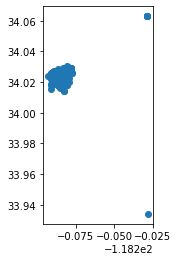

In [34]:
df_students_campus_geo.plot()

### Focus on the main campus

In [28]:
df_students_campus_geo.sort_values("latitude", ascending=False).head(5)

,record_id,date_occurred,time_occurred,part_type,crime_code_description,victim_age,victim_sex,descent_description,latitude,longitude,year,hour,weekday,geometry
4920,110323105,2011-10-21,1200,1,"Theft-grand ($950.01 & over)excpt,guns,fowl,li...",27,male,other,34.0629,-118.2287,2011,12,4,POINT (-118.22870 34.06290)
10245,140321396,2014-10-09,900,1,Theft plain - petty ($950 & under),34,female,white,34.0629,-118.2287,2014,9,3,POINT (-118.22870 34.06290)
3175,100319900,2010-08-14,900,1,Theft plain - petty ($950 & under),25,female,asian,34.0629,-118.2287,2010,9,5,POINT (-118.22870 34.06290)
8881,130310140,2013-04-08,1830,1,"Theft-grand ($950.01 & over)excpt,guns,fowl,li...",22,male,asian,34.0629,-118.2287,2013,18,0,POINT (-118.22870 34.06290)
8727,130323455,2013-11-03,1008,1,Theft plain - petty ($950 & under),23,female,asian,34.0629,-118.2287,2013,10,6,POINT (-118.22870 34.06290)


### Get rid of outlier coordinates

In [29]:
df_students_campus_geo = df_students_campus_geo[
    (df_students_campus_geo["latitude"] > 33.9340)
    & (df_students_campus_geo["latitude"] < 34.06)
]

In [30]:
df_students_campus_geo.plot()

In [35]:
df_students_campus_geo.head()

,record_id,date_occurred,time_occurred,part_type,crime_code_description,victim_age,victim_sex,descent_description,latitude,longitude,year,hour,weekday,geometry
43,200304827,2020-01-15,1030,2,Extortion,20,female,white,34.0215,-118.2868,2020,10,2,POINT (-118.28680 34.02150)
50,200304925,2020-01-15,2320,1,"Theft-grand ($950.01 & over)excpt,guns,fowl,li...",18,male,other,34.0243,-118.2876,2020,23,2,POINT (-118.28760 34.02430)
57,200305014,2020-01-17,1100,1,"Vehicle - motorized scooters, bicycles, and wh...",18,male,asian,34.0209,-118.2842,2020,11,4,POINT (-118.28420 34.02090)
60,200305114,2020-01-20,1000,1,Bike - stolen,30,male,asian,34.0184,-118.2845,2020,10,0,POINT (-118.28450 34.01840)
61,200305115,2020-01-18,1030,1,"Vehicle - motorized scooters, bicycles, and wh...",20,female,black,34.0193,-118.2885,2020,10,5,POINT (-118.28850 34.01930)


In [39]:
counts = (
    df_students_campus_geo.groupby(["latitude", "longitude"])
    .agg({"record_id": "count"})
    .reset_index()
    .rename(columns={"record_id": "count"})
    .sort_values("count", ascending=False)
)
counts

In [46]:
counts

,latitude,longitude,count,geometry
48,34.0215,-118.2868,379,POINT (-118.28680 34.02150)
62,34.0235,-118.2858,168,POINT (-118.28580 34.02350)
71,34.0243,-118.2876,136,POINT (-118.28760 34.02430)
36,34.0204,-118.2809,84,POINT (-118.28090 34.02040)
50,34.0220,-118.2890,76,POINT (-118.28900 34.02200)
...,...,...,...,...
65,34.0239,-118.2879,1,POINT (-118.28790 34.02390)
68,34.0242,-118.2932,1,POINT (-118.29320 34.02420)
69,34.0242,-118.2876,1,POINT (-118.28760 34.02420)
72,34.0243,-118.2853,1,POINT (-118.28530 34.02430)


In [40]:
counts_geo = gpd.GeoDataFrame(
    counts, geometry=gpd.points_from_xy(counts["longitude"], counts["latitude"]),
)

In [43]:
counts_geo = counts_geo[
    (counts_geo["latitude"] > 33.9340) & (counts_geo["latitude"] < 34.06)
]

In [45]:
counts_geo.to_file(
    "../qgis-training/data/geo/df_students_campus_geo_clusters.geojson",
    driver="GeoJSON",
)

### Export

In [31]:
df_students_campus_geo.to_file(
    "../qgis-training/data/geo/df_students_campus_geo.geojson", driver="GeoJSON"
)
df_students_campus_geo.to_file(
    "../demos/qgis-training/data/geo/df_students_campus_geo.geojson", driver="GeoJSON"
)